In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols = ['Sex','Length','Diameter','Hight','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df= pd.read_csv('abalone.data', header=None, names=cols)
df.head()

,Sex,Length,Diameter,Hight,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Hight           4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Hight,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
x = df.iloc[:,1:].values

In [6]:
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[44860.378975952,
 18861.998927978846,
 9889.828962494756,
 6340.081927459619,
 4384.82991662735,
 3438.389737637842,
 2706.8677666982144,
 2331.365882870089,
 2021.4831956304467,
 1717.8814779488623]

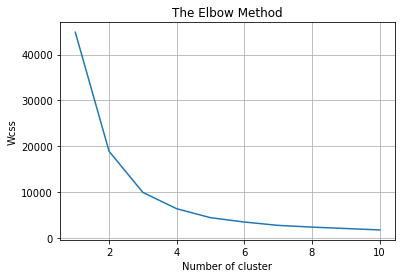

In [10]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Wcss")
plt.grid(True)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=1)
ykmeans = kmeans.fit_predict(x)

In [12]:
ykmeans

array([1, 2, 0, ..., 0, 0, 0])

In [13]:
kmeans.cluster_centers_

array([[ 0.57364035,  0.44874342,  0.15363377,  1.00693048,  0.44330066,
         0.22172434,  0.28465482, 10.4127193 ],
       [ 0.58873469,  0.46642857,  0.16835714,  1.13776327,  0.4316051 ,
         0.23970306,  0.36281939, 16.46122449],
       [ 0.42099147,  0.32127576,  0.10659559,  0.4323742 ,  0.198199  ,
         0.09335714,  0.12139446,  6.88415068]])

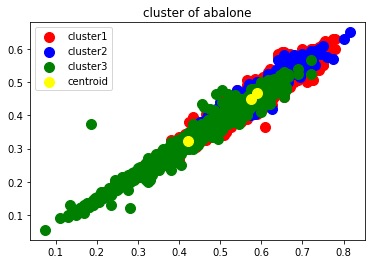

In [14]:
plt.scatter(x[ykmeans==0,0], x[ykmeans==0,1], s=100, c="red", label="cluster1")
plt.scatter(x[ykmeans==1,0], x[ykmeans==1,1], s=100, c="blue", label="cluster2")
plt.scatter(x[ykmeans==2,0], x[ykmeans==2,1], s=100, c="green", label="cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="yellow", label="centroid")
plt.title('cluster of abalone')
plt.legend()
plt.show()

In [15]:
df['Target']=ykmeans

In [16]:
df.head()

,Sex,Length,Diameter,Hight,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Hight           4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Target          4177 non-null   int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 310.1+ KB


In [20]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [21]:
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [22]:
y

array([1, 2, 0, ..., 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [24]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [25]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [26]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [27]:
mymodel(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [28]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [29]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada=AdaBoostClassifier(n_estimators=100)

In [32]:
mymodel(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gdc=GradientBoostingClassifier(n_estimators=100)

In [35]:
mymodel(gdc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(max_samples=100, random_state=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [38]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       700
           1       1.00      0.95      0.98       147
           2       1.00      0.99      1.00       407

    accuracy                           0.99      1254
   macro avg       1.00      0.98      0.99      1254
weighted avg       0.99      0.99      0.99      1254

